Analyze Raw Lead Data

Imports:

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Take a look at the columns

lead_df = pd.read_csv("../data/Lead Scoring.csv")
lead_df.head()

# Target variable is Converted
# "Select" seems to represent NULL values

In [ ]:
lead_df.shape # 9240 x 37

In [ ]:
lead_df.describe()

In [ ]:
lead_df.isnull().sum()

In [ ]:
lead_df['Prospect ID'].nunique()

In [ ]:
lead_df['Lead Number'].nunique()


We can use either Prospect ID or Lead Number as a unique identifier

In [ ]:
lead_df.drop(labels='Prospect ID', axis=1, inplace=True)
lead_df.head()

Next we will convert 'Select' values to NAs

In [ ]:
lead_df = lead_df.replace("Select", np.nan)
lead_df.head()

Check the percentage of null values in each column

In [ ]:
round(100*(lead_df.isnull().sum()/lead_df.shape[0]), 2)

In [ ]:
lead_df['Tags'].unique()

In [ ]:
lead_df['Specialization'].unique()

In [ ]:
lead_df['City'].unique()

In [ ]:
lead_df['Country'].unique()

Drop columns missing more than 35% of observations:

In [ ]:
for col in lead_df.columns:
    if (lead_df[col].isnull().sum()/lead_df.shape[0] >= 0.35):
        lead_df.drop(labels=col, axis=1, inplace=True)

lead_df.shape

Dropped 10 columns due to nulls

In [ ]:
lead_df.head()

In [44]:
lead_df['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [ ]:
lead_df['Lead Source'].unique()

In [ ]:
lead_df['Last Activity'].unique()

In [ ]:
lead_df['Last Notable Activity'].unique()

In [ ]:
lead_df['What is your current occupation'].unique()

In [ ]:
lead_df['What matters most to you in choosing a course'].unique()

In [ ]:
lead_df['Search'].unique()

Plot distributions of categorical variables

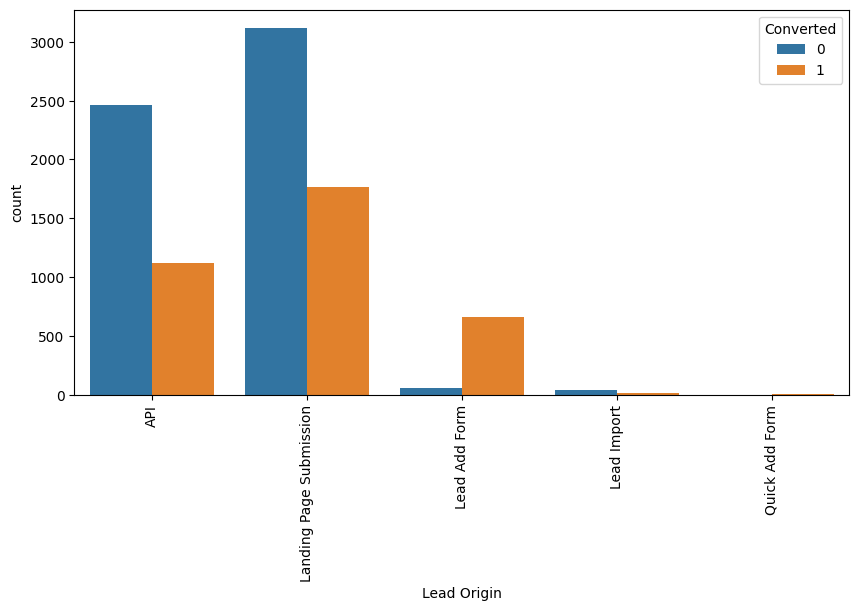

In [48]:
plt.figure(figsize=(10,5))
s1 = sns.countplot(data=lead_df, x='Lead Origin', hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

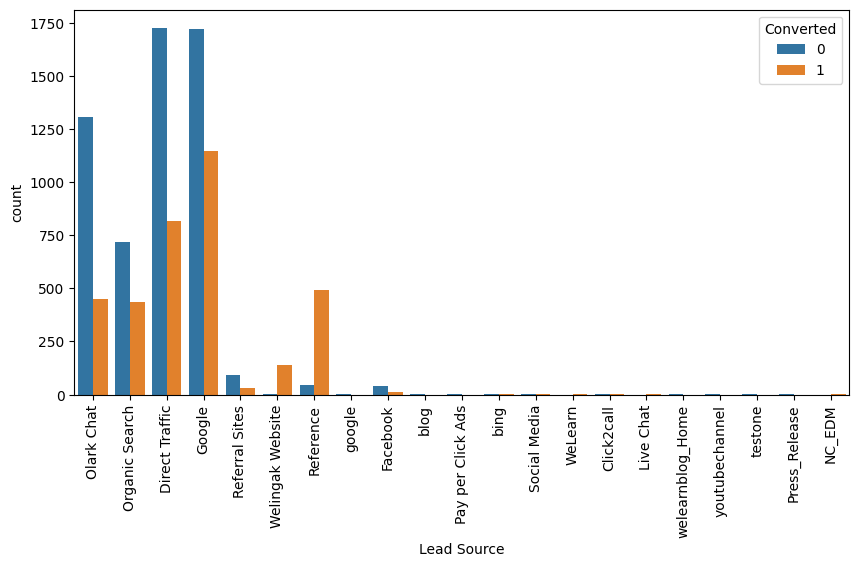

In [49]:
plt.figure(figsize=(10,5))
s1 = sns.countplot(data=lead_df, x='Lead Source', hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()


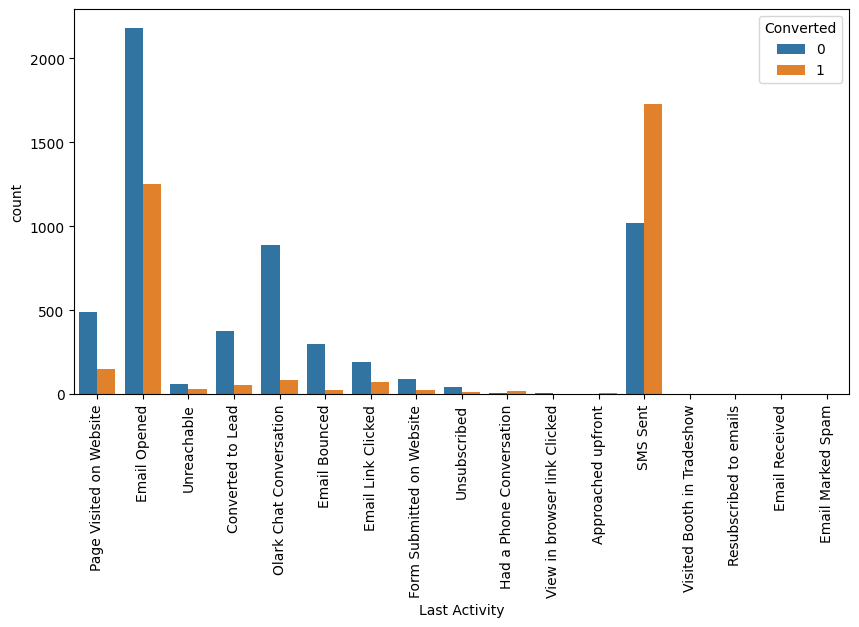

In [50]:
plt.figure(figsize=(10,5))
s1 = sns.countplot(data=lead_df, x='Last Activity', hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()


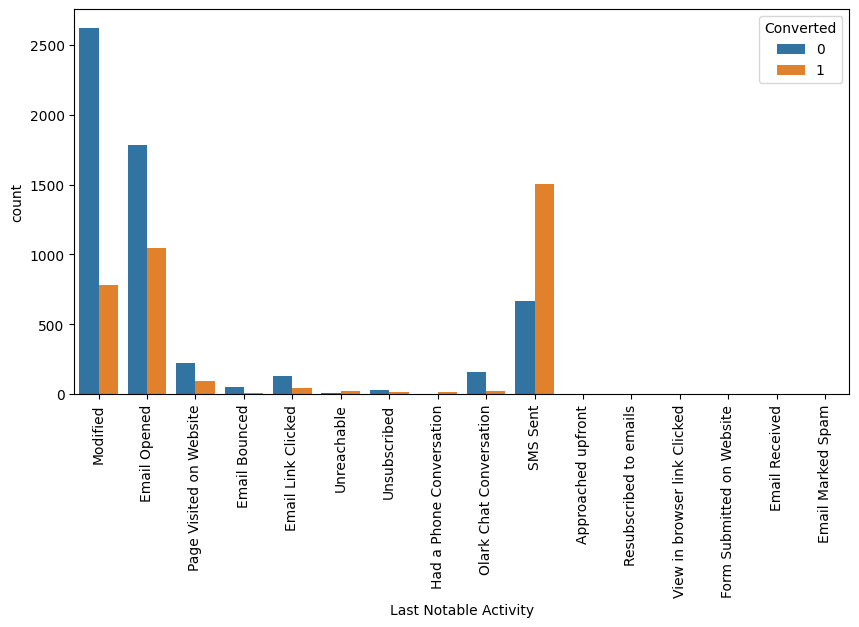

In [51]:
plt.figure(figsize=(10,5))
s1 = sns.countplot(data=lead_df, x='Last Notable Activity', hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()


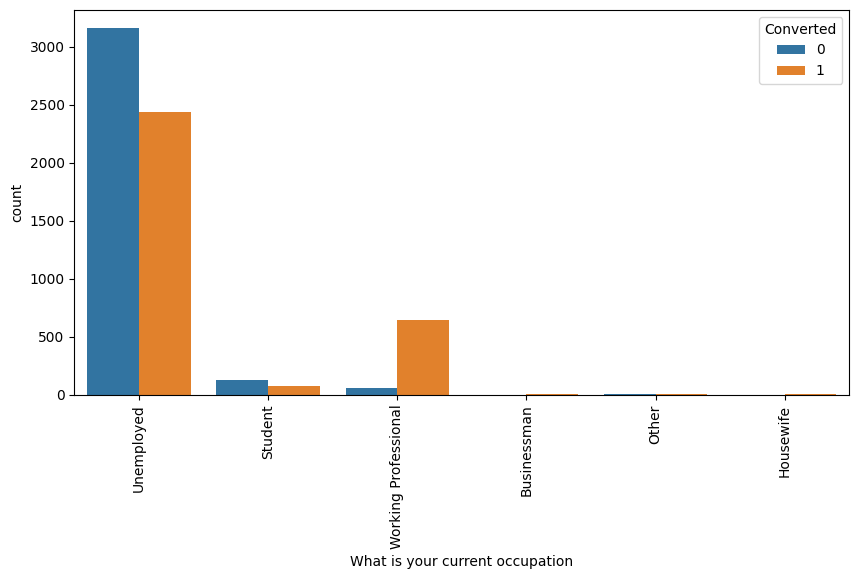

In [52]:
plt.figure(figsize=(10,5))
s1 = sns.countplot(data=lead_df,
                   x='What is your current occupation',
                   hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

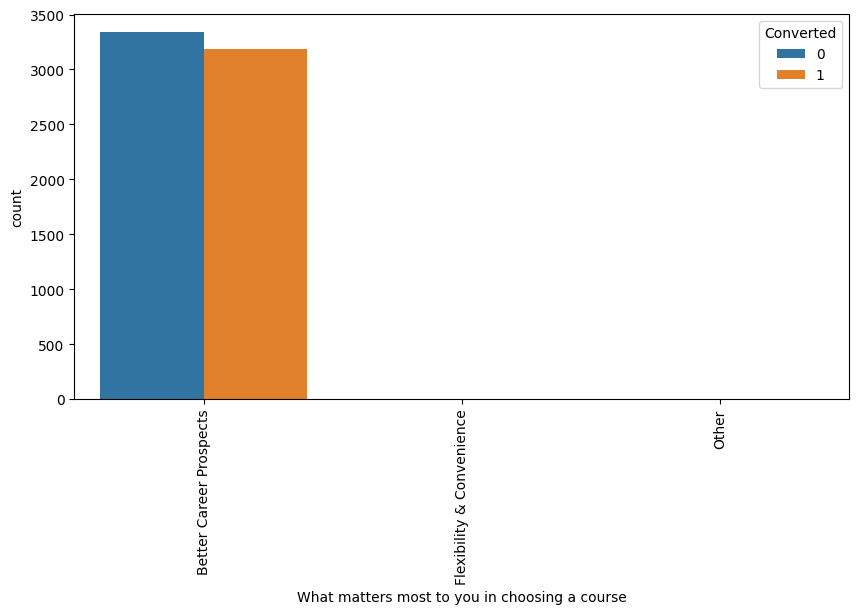

In [53]:
plt.figure(figsize=(10,5))
s1 = sns.countplot(data=lead_df,
                   x='What matters most to you in choosing a course',
                   hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()
# This is probably not a useful feature

In [56]:
lead_df.drop(labels='What matters most to you in choosing a course', axis=1, inplace=True)

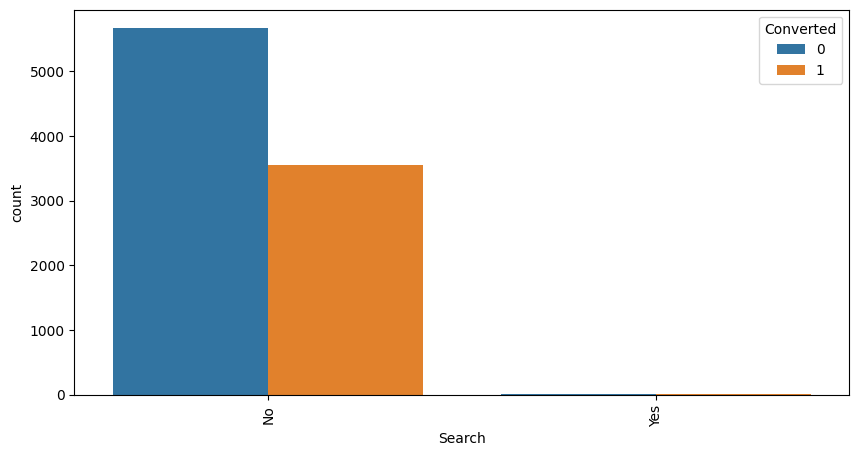

In [55]:
plt.figure(figsize=(10,5))
s1 = sns.countplot(data=lead_df, x='Search', hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

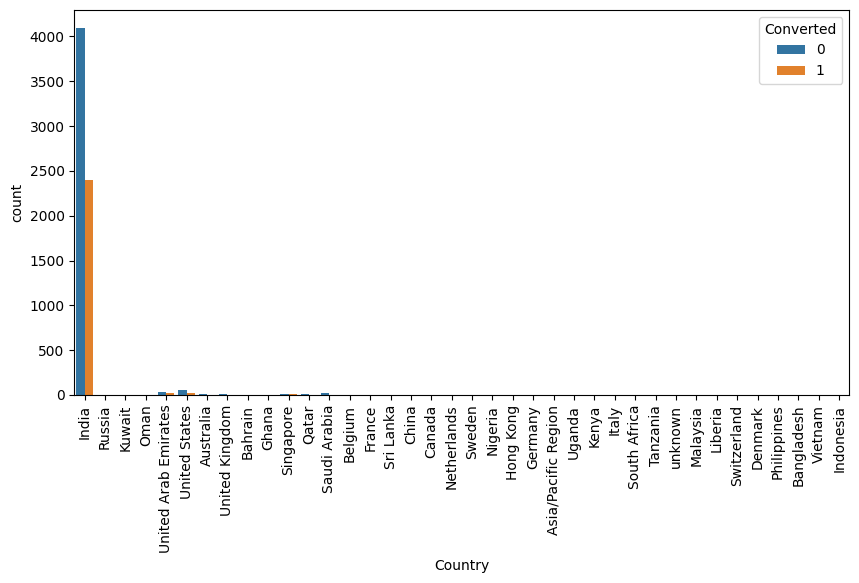

In [64]:
plt.figure(figsize=(10,5))
s1 = sns.countplot(data=lead_df,
                   x='Country',
                   hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()
# Data is super skewed towards India

In [65]:
lead_df.drop(labels='Country', axis=1, inplace=True)

Convert No/Yes to binary variables:

In [57]:
lead_df = lead_df.replace("No", 0)
lead_df = lead_df.replace("Yes", 1)
lead_df.head(15)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.00,Page Visited on Website,...,0,0,0,0,0,0,0,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.50,Email Opened,...,0,0,0,0,0,0,0,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,Email Opened,...,0,0,0,0,0,0,0,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,Unreachable,...,0,0,0,0,0,0,0,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,Converted to Lead,...,0,0,0,0,0,0,0,0,0,Modified
5,660680,API,Olark Chat,0,0,0,0.0,0,0.00,Olark Chat Conversation,...,0,0,0,0,0,0,0,0,0,Modified
6,660673,Landing Page Submission,Google,0,0,1,2.0,1640,2.00,Email Opened,...,0,0,0,0,0,0,0,0,0,Modified
7,660664,API,Olark Chat,0,0,0,0.0,0,0.00,Olark Chat Conversation,...,0,0,0,0,0,0,0,0,0,Modified
8,660624,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.00,Email Opened,...,0,0,0,0,0,0,0,0,1,Email Opened
9,660616,API,Google,0,0,0,4.0,58,4.00,Email Opened,...,0,0,0,0,0,0,0,0,0,Email Opened


In [62]:
lead_df.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.445238,487.698268,2.362820,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554
std,23405.995698,0.270435,0.014711,0.486714,4.854853,548.021466,2.161418,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
lead_df.drop(labels=['Magazine',
                     'Receive More Updates About Our Courses',
                     'Update me on Supply Chain Content',
                     'Get updates on DM Content',
                     'I agree to pay the amount through cheque'],
             axis=1, inplace=True)

lead_df.head(15)


,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.00,Page Visited on Website,NaN,Unemployed,0,0,0,0,0,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.50,Email Opened,India,Unemployed,0,0,0,0,0,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,Email Opened,India,Student,0,0,0,0,0,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,Unreachable,India,Unemployed,0,0,0,0,0,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,Converted to Lead,India,Unemployed,0,0,0,0,0,0,0,Modified
5,660680,API,Olark Chat,0,0,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,0,0,0,0,0,0,0,Modified
6,660673,Landing Page Submission,Google,0,0,1,2.0,1640,2.00,Email Opened,India,Unemployed,0,0,0,0,0,0,0,Modified
7,660664,API,Olark Chat,0,0,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,0,0,0,0,0,0,0,Modified
8,660624,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.00,Email Opened,India,NaN,0,0,0,0,0,0,1,Email Opened
9,660616,API,Google,0,0,0,4.0,58,4.00,Email Opened,India,NaN,0,0,0,0,0,0,0,Email Opened


In [66]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9240 non-null   int64  
 4   Do Not Call                             9240 non-null   int64  
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  What is your current occupation         6550 non-null   obje

Re-check the percentage of missing values

In [67]:
round(100*(lead_df.isnull().sum()/lead_df.shape[0]), 2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
What is your current occupation           29.11
Search                                     0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

Let's impute NAs for current occupation column and then
drop other NAs since the percentage of rows dropped will
be less than 2%.

In [68]:
# Most common current occupation is Unemployed, so we will impute NAs as this
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')
round(100*(lead_df.isnull().sum()/lead_df.shape[0]), 2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [69]:
lead_df = lead_df.dropna()
round(100*(lead_df.isnull().sum()/lead_df.shape[0]), 2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [76]:
binary_columns = lead_df.select_dtypes(include=['int64']).head()
binary_columns.drop(labels=['Lead Number', 'Total Time Spent on Website'], axis=1, inplace=True)

In [85]:
round(100*binary_columns.sum()/binary_columns.shape[0], 10)

# Many of these columns are hugely imbalanced

Do Not Email                               0.0
Do Not Call                                0.0
Converted                                 40.0
Search                                     0.0
Newspaper Article                          0.0
X Education Forums                         0.0
Newspaper                                  0.0
Digital Advertisement                      0.0
Through Recommendations                    0.0
A free copy of Mastering The Interview    20.0
dtype: float64

Drop imbalanced binary columns:

In [86]:
drop_cols = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article',
             'Digital Advertisement', 'Through Recommendations', 'X Education Forums']
lead_df.drop(labels=drop_cols, axis=1, inplace=True)
lead_df.head(10)


,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Newspaper,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Unemployed,0,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,Modified
5,660680,API,Olark Chat,0,0.0,0,0.0,Olark Chat Conversation,Unemployed,0,0,Modified
6,660673,Landing Page Submission,Google,1,2.0,1640,2.0,Email Opened,Unemployed,0,0,Modified
7,660664,API,Olark Chat,0,0.0,0,0.0,Olark Chat Conversation,Unemployed,0,0,Modified
8,660624,Landing Page Submission,Direct Traffic,0,2.0,71,2.0,Email Opened,Unemployed,0,1,Email Opened
9,660616,API,Google,0,4.0,58,4.0,Email Opened,Unemployed,0,0,Email Opened


In [87]:
lead_df.shape
# Now we have 10 features

(9074, 12)